# Homework 1
### Introduction to Data Science EN.553.436/EN.553.636 - Fall 2021

Due date: Wednesday, September 22 at midnight.

## Guidelines
* Answer in the cells immediately below the problem statements. If a problem calls for code, a code cell will follow. If a problem calls for a text response, a Markdown cell will follow.
* Your code should include some comments. Insufficient commentary may result in loss of points. But you do not necessarily need to comment every line or problem. Further guidelines:
    - If the the meaning of some line of code would be obvious to the average Python novice, you do not need to comment (e.g., you do not need to comment _import numpy_). 
    - If your code is moderately complex, you should comment (e.g., if you nest several functions in one line, you should comment). 
    - It may be proper to comment before a code block to describe generally what you are doing (e.g., you should comment before a function definition to explain the function and its parameters).

# Problem 1

## 1.1
Load the _lowbwt_ dataset from the OpenML repository as a Pandas DataFrame from following URL: https://www.openml.org/data/get_csv/3640/dataset_2189_lowbwt.arff. Use a function that is able to handle loading the data directly into Jupyter from the URL. The function should take the URL as an argument. **Do not load the data using a filepath on your hard drive:** again, load the data directly into Jupyter using the URL.

Print the loaded DataFrame. Read the [description](https://www.openml.org/d/203) of the dataset to better understand it. Check the column names and values to see if they match the variables discussed in the description. One or more variables may have been renamed.

In [2]:
import pandas as pd

df = pd.read_csv("https://www.openml.org/data/get_csv/3640/dataset_2189_lowbwt.arff")
df

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,class
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600
...,...,...,...,...,...,...,...,...,...,...
184,1,28,95,1,1,0,0,0,2,2466
185,1,14,100,3,0,0,0,0,2,2495
186,1,23,94,3,1,0,0,0,0,2495
187,1,17,142,2,0,0,1,0,0,2495


## 1.2
From the full DataFrame, extract and print a DataFrame with the birthweight column (and only the birthweight column) for mothers who smoked during pregnancy and had low-birthweight deliveries.

In [5]:
# according to documentation, target is class
selected_weights = df.loc[(df['SMOKE'] == 1) & (df['LOW'] == 1), ['class']]
selected_weights

,class
130,709
132,1135
139,1790
140,1818
141,1885
144,1928
145,1928
147,1936
152,2084
153,2084


## 1.3
Print the following statistics for the birthweights in the original full dataset:
- Standard deviation
- 0.16 Quantile
- Mean
- Median
- 0.84 Quantile

Afterwards, print the same statistics for the birthweights in the subset you selected in 1.2.

In [7]:
import scipy
from scipy.stats import skew, kurtosis
import numpy as np

label = ['Standard Deviation', '0.16 Quantile' , 'Mean','Median', '0.84 Quantile']

# # stats for birthweights in original full dataset
birth_weights = df['class'].values
value = [np.std(birth_weights), np.quantile(birth_weights, 0.16), np.mean(birth_weights), np.median(birth_weights), np.quantile(birth_weights, 0.84)]

print('***Statistics for the birthweights in the original full dataset***')
for i in range(len(label)):
    print(f"{label[i]}: {value[i]}")

print("\n")
    
# stats for birthweights in subset selected in 1.2
selected_data = selected_weights['class'].values

# print(selected_weights)
selected_value = [np.std(selected_data), np.quantile(selected_data, 0.16), np.mean(selected_data), np.median(selected_data), np.quantile(selected_data, 0.84)]
print('***Statistics for the birthweights in the subset selected in 1.2 ***')
for i in range(len(label)):
    print(f"{label[i]}: {selected_value[i]}")


***Statistics for the birthweights in the original full dataset***
Standard Deviation: 727.091228257506
0.16 Quantile: 2226.2
Mean: 2944.6560846560847
Median: 2977.0
0.84 Quantile: 3695.1599999999994


***Statistics for the birthweights in the subset selected in 1.2 ***
Standard Deviation: 393.08747824823365
0.16 Quantile: 1912.52
Mean: 2143.0333333333333
Median: 2260.5
0.84 Quantile: 2439.12


## 1.4
Plot two density histograms: one for the birthweights in the full dataset, and one for the birthweights in the subset you selected in 1.2. Label the histograms.

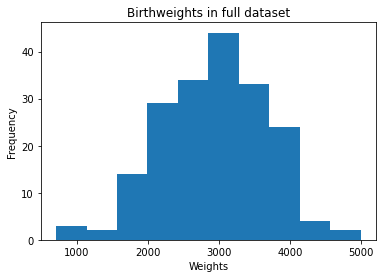

In [10]:
import matplotlib.pyplot as plt

# difference between density plot and normal histogram: y axis of density plot is a percentage
# whereas that of normal histogram is frequency
plt.hist(birth_weights, density=True)
plt.title("Birthweights in full dataset")
plt.xlabel("Weights")
plt.ylabel("Frequency");

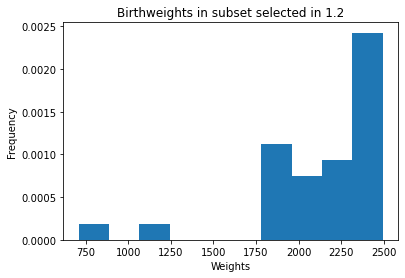

In [11]:
plt.hist(selected_data, density=True)
plt.title("Birthweights in subset selected in 1.2")
plt.xlabel("Weights")
plt.ylabel("Frequency");

## 1.5
Is a normal distribution a plausible model for birthweight in either of the two datasets? Back up your answer using the previous results. This image of a normal PDF may be useful:


![Normal PDF](bell-curve.jpeg)

### _Answer:_

The normal distribution is a plausible model for birthweight in the full dataset. Birthweight in the full dataset has sample quantiles that are approximately aligned with normal quantiles; a sample mean and median that are close; and a density histogram that exhibits an approximately normal shape. The normal distribution is not a plausible model for birthweight in the other dataset because birthweight in that dataset does not have the aforementioned properties.

# Problem 2
In this exercise, we will proceed in steps to perform rejection sampling of a [beta random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) using a [triangular random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html) as candidate.

## 2.1
Plot an overlay of a beta PDF and a triangular PDF with the following parameters:
- For the beta PDF, a=2, b=2, loc=0, scale=1.
- For the triangular PDF, c=0.50, loc=0, scale=1.

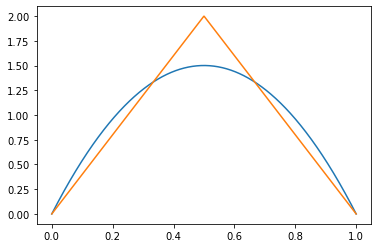

In [16]:
from scipy.stats import beta, triang, uniform
import matplotlib.pyplot as plt

f = lambda x : beta.pdf(x, a=2, b=2, loc=0, scale=1)  # target distribution
g = lambda x : triang.pdf(x, c=0.5, loc=0, scale=1)  # candidate distribution
x = np.linspace(0,1,1000)  
plt.plot(x, p1(x))
plt.plot(x, p2(x))

## 2.2
We will perform 10,000 trials of the rejection sampling procedure. Simulate and store 10,000 random variables distributed as $\text{Uniform}[0,1]$ using random state 436. Simulate and store 10,000 triangular random variables from the specified triangular distribution using random state 636.

In [17]:
N = 10000

norm_rv = uniform.rvs(size=N, random_state=436)
print(norm_rv)

triang_rv = triang.rvs(c=0.5, loc=0, scale=1, size=N, random_state=636)
print(triang_rv)

[0.2370753  0.74754928 0.32864924 ... 0.13534041 0.84101047 0.37894859]
[0.47207495 0.18440343 0.75170731 ... 0.60398335 0.10418176 0.40292859]


## 2.3
Let $f$ be the beta PDF and $g$ the triangular PDF. Using 1.50 as an estimate of $\sup f/g$, generate samples from the beta distribution by rejection sampling. Store your samples. Print the number of samples you obtain.

In [20]:
# rejection sampling; candidate density: triangular distribution; target: beta distribution
# rejection sampling algorithm: https://bookdown.org/rdpeng/advstatcomp/rejection-sampling.html 6.3.1
samples = []
c = 1.5
beta_rv = beta.rvs(a=2, b=2, loc=0, size=N, scale=1, random_state=666)
for i in range(N):
    ratio = f(triang_rv[i]) / g(triang_rv[i])
    # accept if a uniform random variable is <= ratio / c
    if norm_rv[i] <= ratio/c:
        samples.append(triang_rv[i])
        
# number of samples obtained
print(len(samples)) 

6674


## 2.4
Plot a density histogram of your samples overlaid with the beta and triangular PDFs. Use 100 bins.

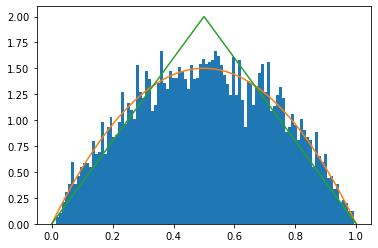

In [22]:
plt.hist(samples, density=True, bins=100);
plt.plot(x, p1(x))
plt.plot(x, p2(x));

# Problem 3

## 3.1
The Epanechnikov kernel is defined by
$$K(u) = \frac{3}{4}\left(1 - u^{2}\right)\qquad\text{for }\lvert u \rvert \leq 1$$
Perform Epanechnikov kernel density estimation on 1,000 simulated samples from a [lognormal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html) with s=1 and random state 636. Use a bandwidth of 2.0. Plot the density estimate over the support of the lognormal distribution. (You can use 2 times the maximum of your samples as an upper bound for the support.)

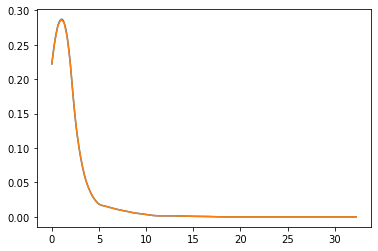

In [13]:
from sklearn.neighbors import KernelDensity
from scipy.stats import lognorm
import numpy as np
import matplotlib.pyplot as plt

# generate 100 random variables using lognormal distribution
samples = lognorm.rvs(s=1, size=1000, random_state=636)

# get the 2 times maximum of samples to avoid strong-edge effect
upper_bound = 2 * samples.max()
x = np.linspace(0, upper_bound, 1000) 

kde = KernelDensity(kernel='epanechnikov', bandwidth=2.0).fit(samples[:, np.newaxis]) # reshape to 2D array as required
lognorm_dens = kde.score_samples(x[:, np.newaxis]) # print log-likelihood of each sample under the model.

f = np.exp(lognorm_dens)
plt.plot(x, f)

# 解法2:
def epa(u):
    return (3/4)*(1-u**2)*(abs(u)<=1)

kde = lambda x, data, bw: (1/(len(data)*bw)) * sum([epa((x - data[i])/bw) \
                                for i in range(len(data))])

x = np.linspace(0, 2*max(samples), 100);
bw = 2.0
plt.plot(x, kde(x, samples, bw))
plt.show()

## 3.2
Test whether the estimate integrates to unity over the support of the lognormal distribution.

In [28]:
# use trapezoidal function to integrate to unity over the support of lognormal distribution
np.trapz(f, x)

0.8218100002145949

## 3.3
Explain the results of your integration.

### _Answer:_

The density estimate does not integrate to unity because the support of the lognormal distribution is nonnegative, while the support of the density estimate extends into the negative domain as can be seen from the plot below.

Integral:	 1.0000368736356235


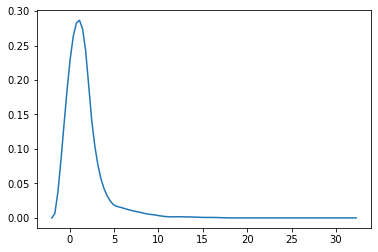

In [20]:
x = np.linspace(-2, 2*max(samples), 100);
bw = 2.0
plt.plot(x, kde(x, samples, bw))

print('Integral:\t', np.trapz(kde(x, samples, bw), x))

# Problem 4

## 4.1
Below we load the [Boston house prices dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset). We also store the labels of the predictor variables for you.

Our goal will be to predict house price (MEDV) by regression. Split the dataset into a training and test set using 1/3 as the test size and a random state of 553. Use the function [_train_test_split_](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from _sklearn.model_selection_ for this purpose.

In [22]:
# Loading data:

# Import function for loading the 'boston' dataset.
from sklearn.datasets import load_boston
# Load a 'bunch' containing data and descriptions.
boston_bunch = load_boston()
# Extract and store predictor variables.
X = boston_bunch.data
# Extract and store the variable that is the target for prediction.
y = boston_bunch.target
# Extract and store labels of predictor variables.
labels = boston_bunch.feature_names

In [23]:
# Your code:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=float(1/3), random_state=553)

## 4.2
Fit three different linear models on the training set by ordinary least squares (OLS): 
- A model using all predictor variables.
- A model using only AGE, NOX, DIS, and RAD as predictor variables.
- A model using all polynomial combinations of degree $\leq 2$ of the original thirteen predictor variables.

In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np
from array import array
# model 1: OLS (all predictor variables)
ols_linear_reg = LinearRegression().fit(X_train, y_train) # linear regression

# model 2: OLS with 4 predictor variables.
predictor_label = ['AGE', 'NOX', 'DIS', 'RAD']
cols_wanted = np.where(np.isin(labels, predictor_label))

num_rows, _ = X_train.shape # get number of rows from training set
selected_X_train = X_train[:, cols_wanted].reshape(num_rows, 4)
selected_lr = LinearRegression().fit(selected_X_train, y_train)

# model 3: OLS with polynomial combination of degree <=2
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
preprocessed_lr = LinearRegression()
xpf = pf.fit_transform(X_train)
preprocessed_lr.fit(xpf,y_train)

LinearRegression()

## 4.3
For model assessment, print the following for each of the three models:
- The $R^{2}$ of the predictions on the training set.
- The $R^{2}$ of the predictions on the test set.
- Predicted MEDV for the first five sample points in the test set.
- True MEDV for the first five sample points in the test set.

In [25]:
def print_value(model_name, *args):
    """
    function that prints the value for particular model
    params:
        model_name: str. 
        args: int or list of R^2 and MEDV values as required
    return:
        None
    """
    
    label = ['R^2 for training set', 'R^2 for test set' , 'Predicted MEDV (first 5 samples)', \
             'Actual MEDV (first 5 samples)']
    
    print(f"\n*** {model_name} ***")
    for i in range(len(label)):
        print(f"{label[i]}: {args[i]}")


# model 1: OLS (all predictor variables)
r2_train_lr = ols_linear_reg.score(X_train, y_train)
r2_test_lr = ols_linear_reg.score(X_test, y_test)
medv_hat_lr = ols_linear_reg.predict(X_test[:5])
medv_lr = y_test[:5]
print_value("Model: OLS (all predictor variables)", r2_train_lr, r2_test_lr, medv_hat_lr, medv_lr)

# model 2: OLS with 4 predictor variables.

# get row no. of test set
num_rows, _ = X_test.shape 
# process test set to partcular dimension
selected_X_test = X_test[:, cols_wanted].reshape(num_rows, 4) 

r2_train_selected = selected_lr.score(selected_X_train, y_train)
r2_test_selected = selected_lr.score(selected_X_test, y_test)
medv_hat_slr = selected_lr.predict(selected_X_test[:5])
print_value("Model: OLS (4 predictor variables)", r2_train_selected, r2_test_selected, medv_hat_slr, medv_lr)

# model 3: OLS with polynomial combination of degree <=2

# get x variable after pre-processing (generating polynomial features)
xpf_test = pf.fit_transform(X_test)

r2_trained_pf = preprocessed_lr.score(xpf, y_train)
r2_test_pf = preprocessed_lr.score(xpf_test, y_test)
medv_hat_pf = preprocessed_lr.predict(xpf[:5])
print_value("Model: OLS with polynomial combination of degree <=2", r2_trained_pf, r2_test_pf, \
            medv_hat_pf, medv_lr)      


*** Model: OLS (all predictor variables) ***
R^2 for training set: 0.7666994695638145
R^2 for test set: 0.6872592137146449
Predicted MEDV (first 5 samples): [24.2652595  12.11746393 27.67012303 24.11419114 21.83525384]
Actual MEDV (first 5 samples): [24.6  5.6 27.1 21.9 20. ]

*** Model: OLS (4 predictor variables) ***
R^2 for training set: 0.2815080549659952
R^2 for test set: 0.18523720715377578
Predicted MEDV (first 5 samples): [27.88749751 15.41806533 25.36918791 24.09219392 26.37783049]
Actual MEDV (first 5 samples): [24.6  5.6 27.1 21.9 20. ]

*** Model: OLS with polynomial combination of degree <=2 ***
R^2 for training set: 0.8908633483529383
R^2 for test set: 0.7023336101169156
Predicted MEDV (first 5 samples): [20.61694193 19.116256   28.56910515 19.51050615 23.50633717]
Actual MEDV (first 5 samples): [24.6  5.6 27.1 21.9 20. ]


## 4.4
Comment on your results in 4.3, which model do you think is the best? Explain you answer.

### _Answer:_

The third model (OLS with polynomial combination of degree <=2) is the best. The reasons are as below:
1. The $R^{2}$ of both training set and test set is more approximate to 1, comparing to other 2 models. This represents that the model fits better with the actual data
2. The predicted MEDV and actual MEDV fits quite well

## 4.5
Consider the linear regression model using all original features you built above. Holding all other variables equal, what effect does the model predict that an increase in 0.1 parts per 10 million nitric oxide concentration in a place will have on the median value of of owner-occupied homes in that place? Write code that will return and print the answer.

In [27]:
# y1 = kx + b
# y2 = k (x + x_delta) + b
# y2 - y1 = k*x_delta
index = np.where(labels=='NOX')
print(ols_linear_reg.coef_[index])
beta = ols_linear_reg.coef_[index][0] * 0.1
print('Change in value of', beta*1000, 'USD.')

[-16.49636622]
Change in value of -1649.63662161828 USD.
